In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

In [77]:
df=pd.read_csv(r'C:\Users\garim\OneDrive\Desktop\Data Science\pizza_sales.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [79]:
print("Sort Values:")
df2=df.sort_values(by='quantity')
df2

Sort Values:


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
32259,32260.0,14252.0,thai_ckn_l,1.0,26-08-2015,15:31:15,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
32260,32261.0,14253.0,pepperoni_l,1.0,26-08-2015,15:48:22,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
32261,32262.0,14254.0,spinach_fet_m,1.0,26-08-2015,16:15:41,16.00,16.00,M,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza
32262,32263.0,14255.0,classic_dlx_s,1.0,26-08-2015,16:18:47,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
44157,44158.0,19411.0,big_meat_s,3.0,27-11-2015,12:13:36,12.00,36.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
35627,35628.0,15728.0,ital_cpcllo_l,3.0,20-09-2015,12:30:44,20.50,61.50,L,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza
11976,11977.0,5264.0,big_meat_s,4.0,30-03-2015,13:24:35,12.00,48.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
35496,35497.0,15674.0,cali_ckn_l,4.0,19-09-2015,14:16:35,20.75,83.00,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


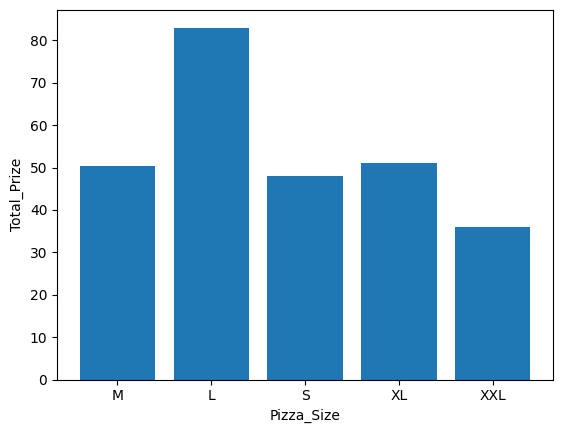

In [80]:
pizza_size = df2['pizza_size']
total_price = df2['total_price']
plt.bar(pizza_size,total_price)
plt.xlabel('Pizza_Size')
plt.ylabel('Total_Prize')
plt.show()


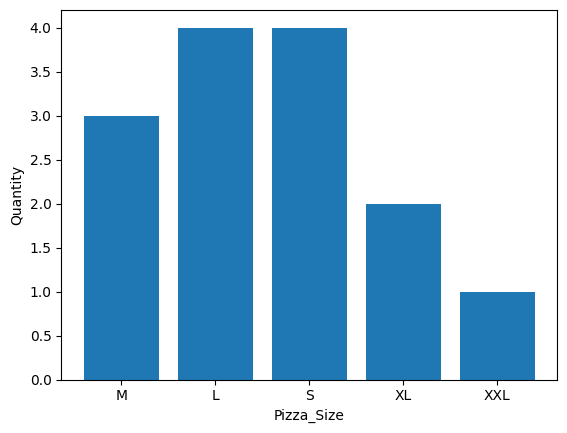

In [81]:
pizza_size = df2['pizza_size']
quantity = df2['quantity']
plt.bar(pizza_size,quantity)
plt.xlabel('Pizza_Size')
plt.ylabel('Quantity')
plt.show()

In [82]:
pizza_category = df['pizza_category'].value_counts()
labels = pizza_category.index
sizes = pizza_category.values

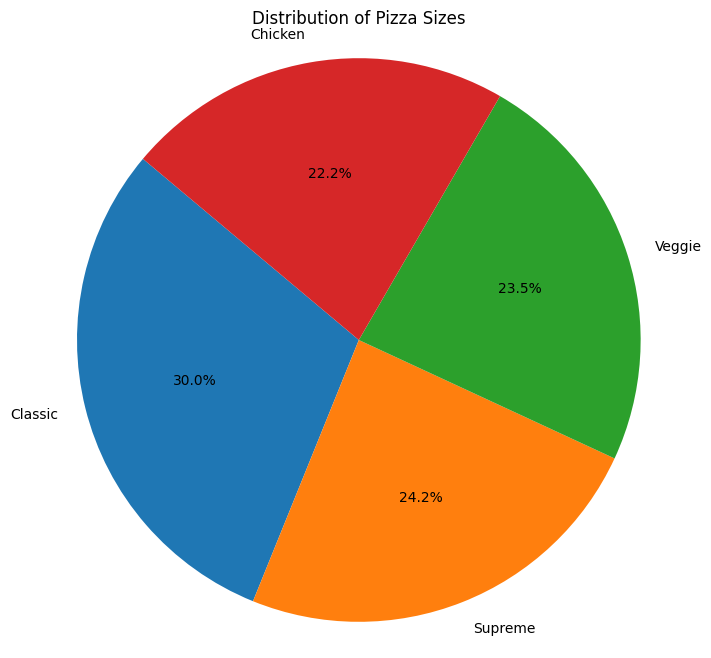

In [83]:
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pizza Sizes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

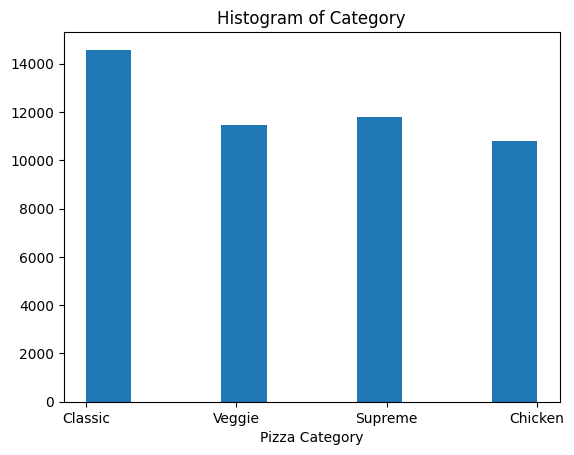

In [84]:
plt.hist(df['pizza_category']) 
plt.xlabel('Pizza Category')
#plt.ylabel('order_time')
plt.title('Histogram of Category')
#plt.grid(True)
plt.show()

In [85]:
df3=df2[['quantity','pizza_category','pizza_size']]

In [86]:
Category_le=LabelEncoder()
Size_le=LabelEncoder()

In [87]:
df3['pizza_category'] = df3['pizza_category'].astype(str)
df3['pizza_size'] = df3['pizza_size'].astype(str)
df3['pizza_category']=Category_le.fit_transform(df3['pizza_category'])
df3['pizza_size']=Size_le.fit_transform(df3['pizza_size'])

C:\Users\garim\AppData\Local\Temp\ipykernel_40036\2219366223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pizza_category'] = df3['pizza_category'].astype(str)
C:\Users\garim\AppData\Local\Temp\ipykernel_40036\2219366223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pizza_size'] = df3['pizza_size'].astype(str)
C:\Users\garim\AppData\Local\Temp\ipykernel_40036\2219366223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [88]:
X=df3[['quantity']]
y=df3[['pizza_size']]

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [90]:
X_train

,quantity
8663,1.0
21392,1.0
48393,1.0
6441,1.0
34018,1.0
...,...
4216,1.0
22987,1.0
31164,1.0
24136,1.0


In [91]:
# Linear Regression
model=LinearRegression()

In [92]:
model.fit(X_train,y_train)

LinearRegression()

In [93]:
model.score(X_test,y_test)*100

-0.0031269587048354808

In [94]:
# Decision Tree Regressor
mod=DecisionTreeRegressor()

In [95]:
mod.fit(X_train,y_train)

DecisionTreeRegressor()

In [96]:
pre=mod.predict(X_test)

In [97]:
mod.score(X_test,y_test)*100

-0.003056635984965972

In [98]:
# Random Forest Regressor
s=[]
a=[]

In [99]:
for j in range(10,150,5):
    model=RandomForestRegressor(n_estimators=j)
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    s.append(acc)
    a.append(j)

c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConvers

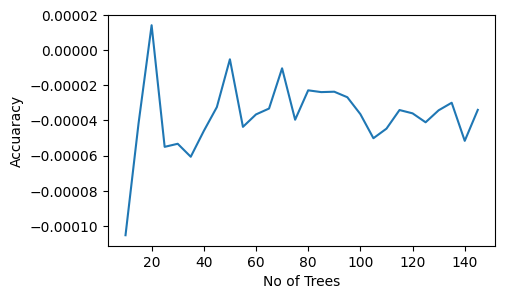

In [100]:
plt.figure(figsize=(5,3))
plt.plot(a,s)
plt.xlabel("No of Trees")
plt.ylabel("Accuaracy")
plt.show()

In [101]:
m=RandomForestRegressor(n_estimators=10)

In [102]:
m.fit(X_train,y_train)

c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10)

In [103]:
m.score(X_test,y_test)*100

0.0008381213741026627

In [104]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [105]:
# SVM Regressor
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [106]:
svr_model.score(X_test,y_test)*100

-0.15755185501178381

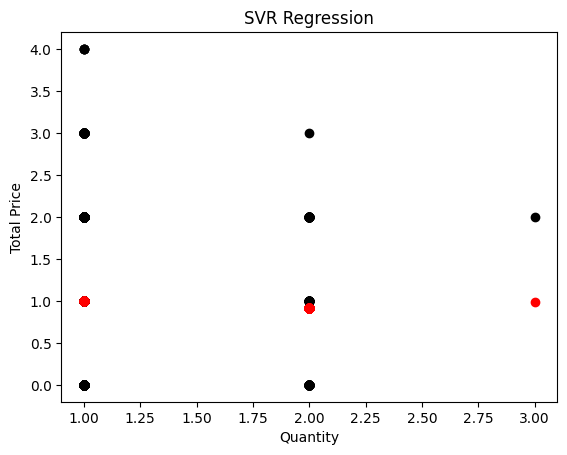

In [148]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('SVR Regression')
#plt.legend()
plt.show()

In [108]:
# Gaussian Process Regression
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10, random_state=15, optimizer='fmin_l_bfgs_b', normalize_y=True)

In [109]:
batch_size = 1000
n_batches = len(X_train) // batch_size + (len(X_train) % batch_size != 0)

for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(X_train))
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]
    if i == 0:
        gpr_model.fit(X_batch, y_batch)
    else:
        # Update kernel
        gpr_model.kernel_ = gpr_model.kernel
        # Fit the model on the batch
        gpr_model.fit(X_batch, y_batch)


c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\garim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.

In [110]:
gpr_model.score(X_test,y_test)*100

-0.38708410268051274

In [144]:
y_pred_gpr, std_dev = gpr_model.predict(X_test, return_std=True)

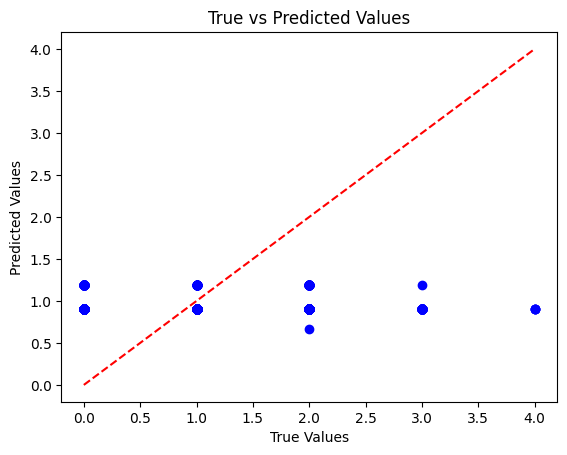

In [145]:
plt.scatter(y_test, y_pred_gpr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [115]:
#Neural Networks
nn_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=15)

In [116]:
nn_regressor.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=15)

In [118]:
nn_regressor.score(X_test,y_test)*100

-0.49823038802212505

In [142]:
y_pred_nn = nn_regressor.predict(X_test)

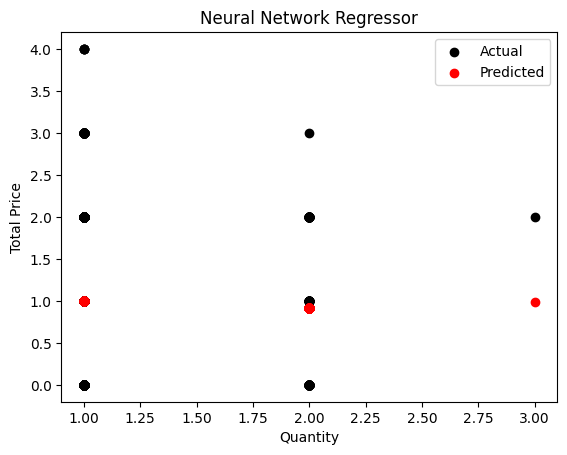

In [143]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_nn, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Neural Network Regressor')
plt.legend()
plt.show()

In [120]:
#k-Nearest Neighbors (KNN)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [121]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [122]:
knn_regressor.score(X_test,y_test)*100

-2.5255772303445

In [140]:
y_pred_knn = knn_regressor.predict(X_test)

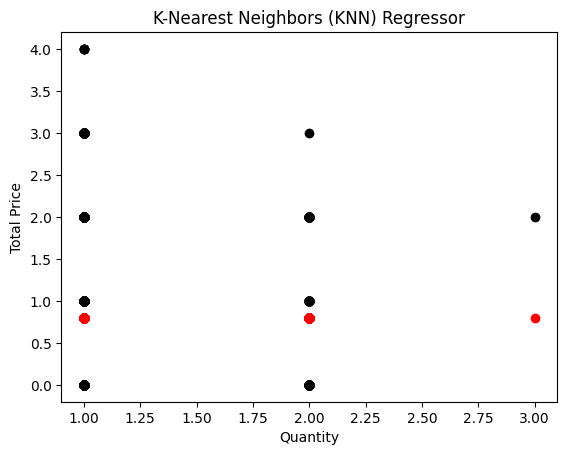

In [141]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred_knn, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('K-Nearest Neighbors (KNN) Regressor')
plt.show()

In [125]:
#Ridge Regression 
ridge_model = Ridge(alpha=1.0)

In [126]:
ridge_model.fit(X_train, y_train)

Ridge()

In [127]:
ridge_model.score(X_test,y_test)*100

-0.003089319286031511

In [134]:
y_pred_ridge = ridge_model.predict(X_test)

In [133]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

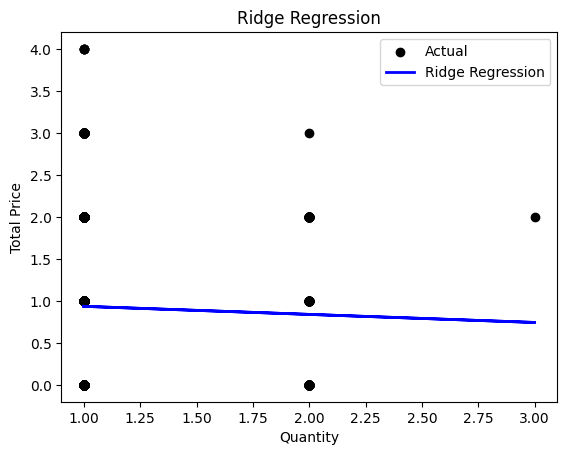

In [135]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred_ridge, color='blue', linewidth=2, label='Ridge Regression')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Ridge Regression')
plt.legend()
plt.show()

In [129]:
#Lasso Regression
lasso_model = Lasso(alpha=1.0)

In [130]:
lasso_model.fit(X_train,y_train)

Lasso()

In [131]:
lasso_model.score(X_test,y_test)

-4.480564197439918e-07

In [136]:
y_pred_lasso = lasso_model.predict(X_test)

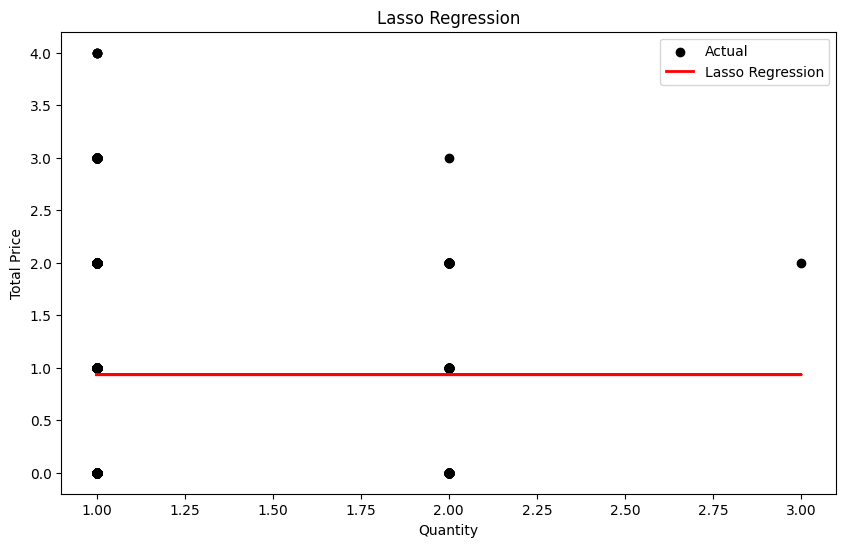

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2, label='Lasso Regression')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.title('Lasso Regression')
plt.legend()
plt.show()